# UMAPs Neurips samples, NK cells

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Neurips
adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm_outer.h5ad')

In [3]:
adata_neurips

AnnData object with n_obs × n_vars = 80998 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [4]:
adata_neurips.obs['cell_type'].unique().tolist()

['NK',
 'CD8+ T CD69+ CD45RA+',
 'NK CD158e1+',
 'HSC',
 'CD14+ Mono',
 'B1 B IGKC+',
 'CD4+ T activated',
 'CD8+ T CD69+ CD45RO+',
 'G/M prog',
 'Naive CD20+ B IGKC-',
 'CD8+ T CD49f+',
 'Naive CD20+ B IGKC+',
 'CD4+ T naive',
 'CD8+ T naive',
 'CD4+ T activated integrinB7+',
 'cDC2',
 'gdT TCRVD2+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD16+ Mono',
 'Erythroblast',
 'MAIT',
 'T reg',
 'gdT CD158b+',
 'Transitional B',
 'Proerythroblast',
 'CD8+ T CD57+ CD45RO+',
 'Plasmablast IGKC+',
 'ILC1',
 'Lymph prog',
 'ILC',
 'MK/E prog',
 'Normoblast',
 'CD8+ T CD57+ CD45RA+',
 'pDC',
 'B1 B IGKC-',
 'Plasma cell IGKC-',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T naive CD127+ CD26- CD101-',
 'CD4+ T CD314+ CD45RA+',
 'cDC1',
 'T prog cycling',
 'dnT']

In [5]:
#Both NK cell types selected


neurips_nk = adata_neurips[(adata_neurips.obs['cell_type'] == "NK") | (adata_neurips.obs['cell_type'] == "NK CD158e1+")]

In [6]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [7]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [8]:
#selecting one sample from Neurips

eg=adata_neurips[adata_neurips.obs['POOL'] == "s4d1"]


In [9]:
eg

View of AnnData object with n_obs × n_vars = 4885 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [10]:
prot=eg.obsm['protein_expression_clr_neurips']

In [11]:
prot

CD86     CD274     CD270     CD155     CD112  \
GTAGTACCAATCCTTT-1-s4d1  0.652674  1.447594  1.489354  0.890243  1.290341   
CTCAAGAGTCACAGAG-1-s4d1  0.652674  1.069339  1.657770  0.890243  1.377072   
CTGTGGGTCATGCGGC-1-s4d1  0.378666  1.132949  1.153412  0.730824  1.195368   
CGTGATAGTTATCTGG-1-s4d1  0.000000  1.249182  1.335424  1.256332  2.674106   
AGATCCAAGATCGGTG-1-s4d1  2.784459  1.132949  1.674846  1.669058  1.663981   
...                           ...       ...       ...       ...       ...   
TAGATCGTCTCTATAC-1-s4d1  0.000000  1.132949  1.358918  1.523729  1.195368   
AAGACTCAGGGCAAGG-1-s4d1  0.652674  1.302596  1.208881  0.541080  1.090419   
CGAGAAGCACCTCGTT-1-s4d1  0.378666  0.764571  1.208881  0.730824  1.494512   
TATCCTAGTTCTCCTG-1-s4d1  0.000000  1.302596  1.286711  0.890243  1.377072   
TGCCGAGCAACAAAGT-1-s4d1  0.378666  1.302596  1.786846  0.541080  1.724470   

                             CD47      CD48      CD40     CD154      CD52  \
GTAGTACCAATCCTTT-1-s4d1  1.988618  1.733474  0.850004  1.531390  0.694828   
CTCAAGAGTCACAGAG-1-s4d1  1.264995  1.863027  1.101769  1.562259  1.072649   
CTGTGGGTCATGCGGC-1-s4d1  1.546005  1.090567  1.173337  1.303511  1.013739   
CGTGATAGTTATCTGG-1-s4d1  1.322314  0.289336  1.240123  1.397398  1.525053   
AGATCCAAGATCGGTG-1-s4d1  2.101246  2.112640  1.417276  1.884321  1.861734   
...                           ...       ...       ...       ...       ...   
TAGATCGTCTCTATAC-1-s4d1  1.312986  1.077960  1.173337  1.690467  1.013739   
AAGACTCAGGGCAAGG-1-s4d1  1.589583  1.436578  1.240123  1.379313  0.561056   
CGAGAAGCACCTCGTT-1-s4d1  1.944753  2.308527  0.941152  1.342130  1.231042   
TATCCTAGTTCTCCTG-1-s4d1  1.150531  0.882414  1.469979  1.649530  0.607664   
TGCCGAGCAACAAAGT-1-s4d1  1.603697  1.857224  0.941152  1.767631  2.943224   

                         ...     HLA-E      CD82     CD101      CD88  \
GTAGTACCAATCCTTT-1-s4d1  ...  1.532575  0.614600  0.900688  1.389844   
CTCAAGAGTCACAGAG-1-s4d1  ...  1.283465  0.614600  1.786480  0.762359   
CTGTGGGTCATGCGGC-1-s4d1  ...  1.344431  0.353792  0.860303  0.979461   
CGTGATAGTTATCTGG-1-s4d1  ...  0.859205  1.527772  0.629556  0.854928   
AGATCCAAGATCGGTG-1-s4d1  ...  1.429432  1.031029  2.808629  2.007436   
...                      ...       ...       ...       ...       ...   
TAGATCGTCTCTATAC-1-s4d1  ...  1.482333  0.353792  0.576253  1.157734   
AAGACTCAGGGCAAGG-1-s4d1  ...  1.149104  0.614600  0.818218  1.189870   
CGAGAAGCACCTCGTT-1-s4d1  ...  1.184424  0.773465  0.939506  1.017749   
TATCCTAGTTCTCCTG-1-s4d1  ...  1.401893  1.405442  0.860303  1.124532   
TGCCGAGCAACAAAGT-1-s4d1  ...  1.344431  3.507507  3.029109  1.363610   

                            CD224  CD197  CD34  CD10  CD90  CD15  
GTAGTACCAATCCTTT-1-s4d1  0.918109    0.0   0.0   0.0   0.0   0.0  
CTCAAGAGTCACAGAG-1-s4d1  1.112478    0.0   0.0   0.0   0.0   0.0  
CTGTGGGTCATGCGGC-1-s4d1  1.147198    0.0   0.0   0.0   0.0   0.0  
CGTGATAGTTATCTGG-1-s4d1  1.000442    0.0   0.0   0.0   0.0   0.0  
AGATCCAAGATCGGTG-1-s4d1  2.064066    0.0   0.0   0.0   0.0   0.0  
...                           ...    ...   ...   ...   ...   ...  
TAGATCGTCTCTATAC-1-s4d1  1.304730    0.0   0.0   0.0   0.0   0.0  
AAGACTCAGGGCAAGG-1-s4d1  1.180752    0.0   0.0   0.0   0.0   0.0  
CGAGAAGCACCTCGTT-1-s4d1  1.112478    0.0   0.0   0.0   0.0   0.0  
TATCCTAGTTCTCCTG-1-s4d1  1.304730    0.0   0.0   0.0   0.0   0.0  
TGCCGAGCAACAAAGT-1-s4d1  1.868853    0.0   0.0   0.0   0.0   0.0  

[4885 rows x 139 columns]

In [12]:
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CX3CR1': 'CX3CR1_prot', 'CD52': 'CD52_prot','CD69': 'CD69_prot', 'CD226':'CD226_prot', 'TIGIT':'TIGIT_prot', 'CD27':'CD27_prot', 'CD38': 'CD38_prot', 'CD224': 'CD224_prot', 'CD7': 'CD7_prot', 'CD44': 'CD44_prot', 'CD34': 'CD34_prot','CD5': 'CD5_prot'})


In [13]:
#some proteins and genes have same names, here _prot added after protein names

a = eg.obs
b = prot

adata_eg=pd.concat([a, b], axis=1)
eg.obs=adata_eg



In [14]:
#selecting NK cells, gd T cells and ILCs

sample_nk = eg[(eg.obs['cell_type'] == "NK") | (eg.obs['cell_type'] == "NK CD158e1+") | (eg.obs['cell_type'] == "ILC") | (eg.obs['cell_type'] == "gdT CD158b+")]   


## Neigbors computed only once

In [15]:
#Computing a neighborhood of observations, adata_neurips represents whole Neurips dataset

sc.pp.neighbors(adata_neurips, use_rep="X_totalVI")  

sc.tl.umap(adata_neurips)

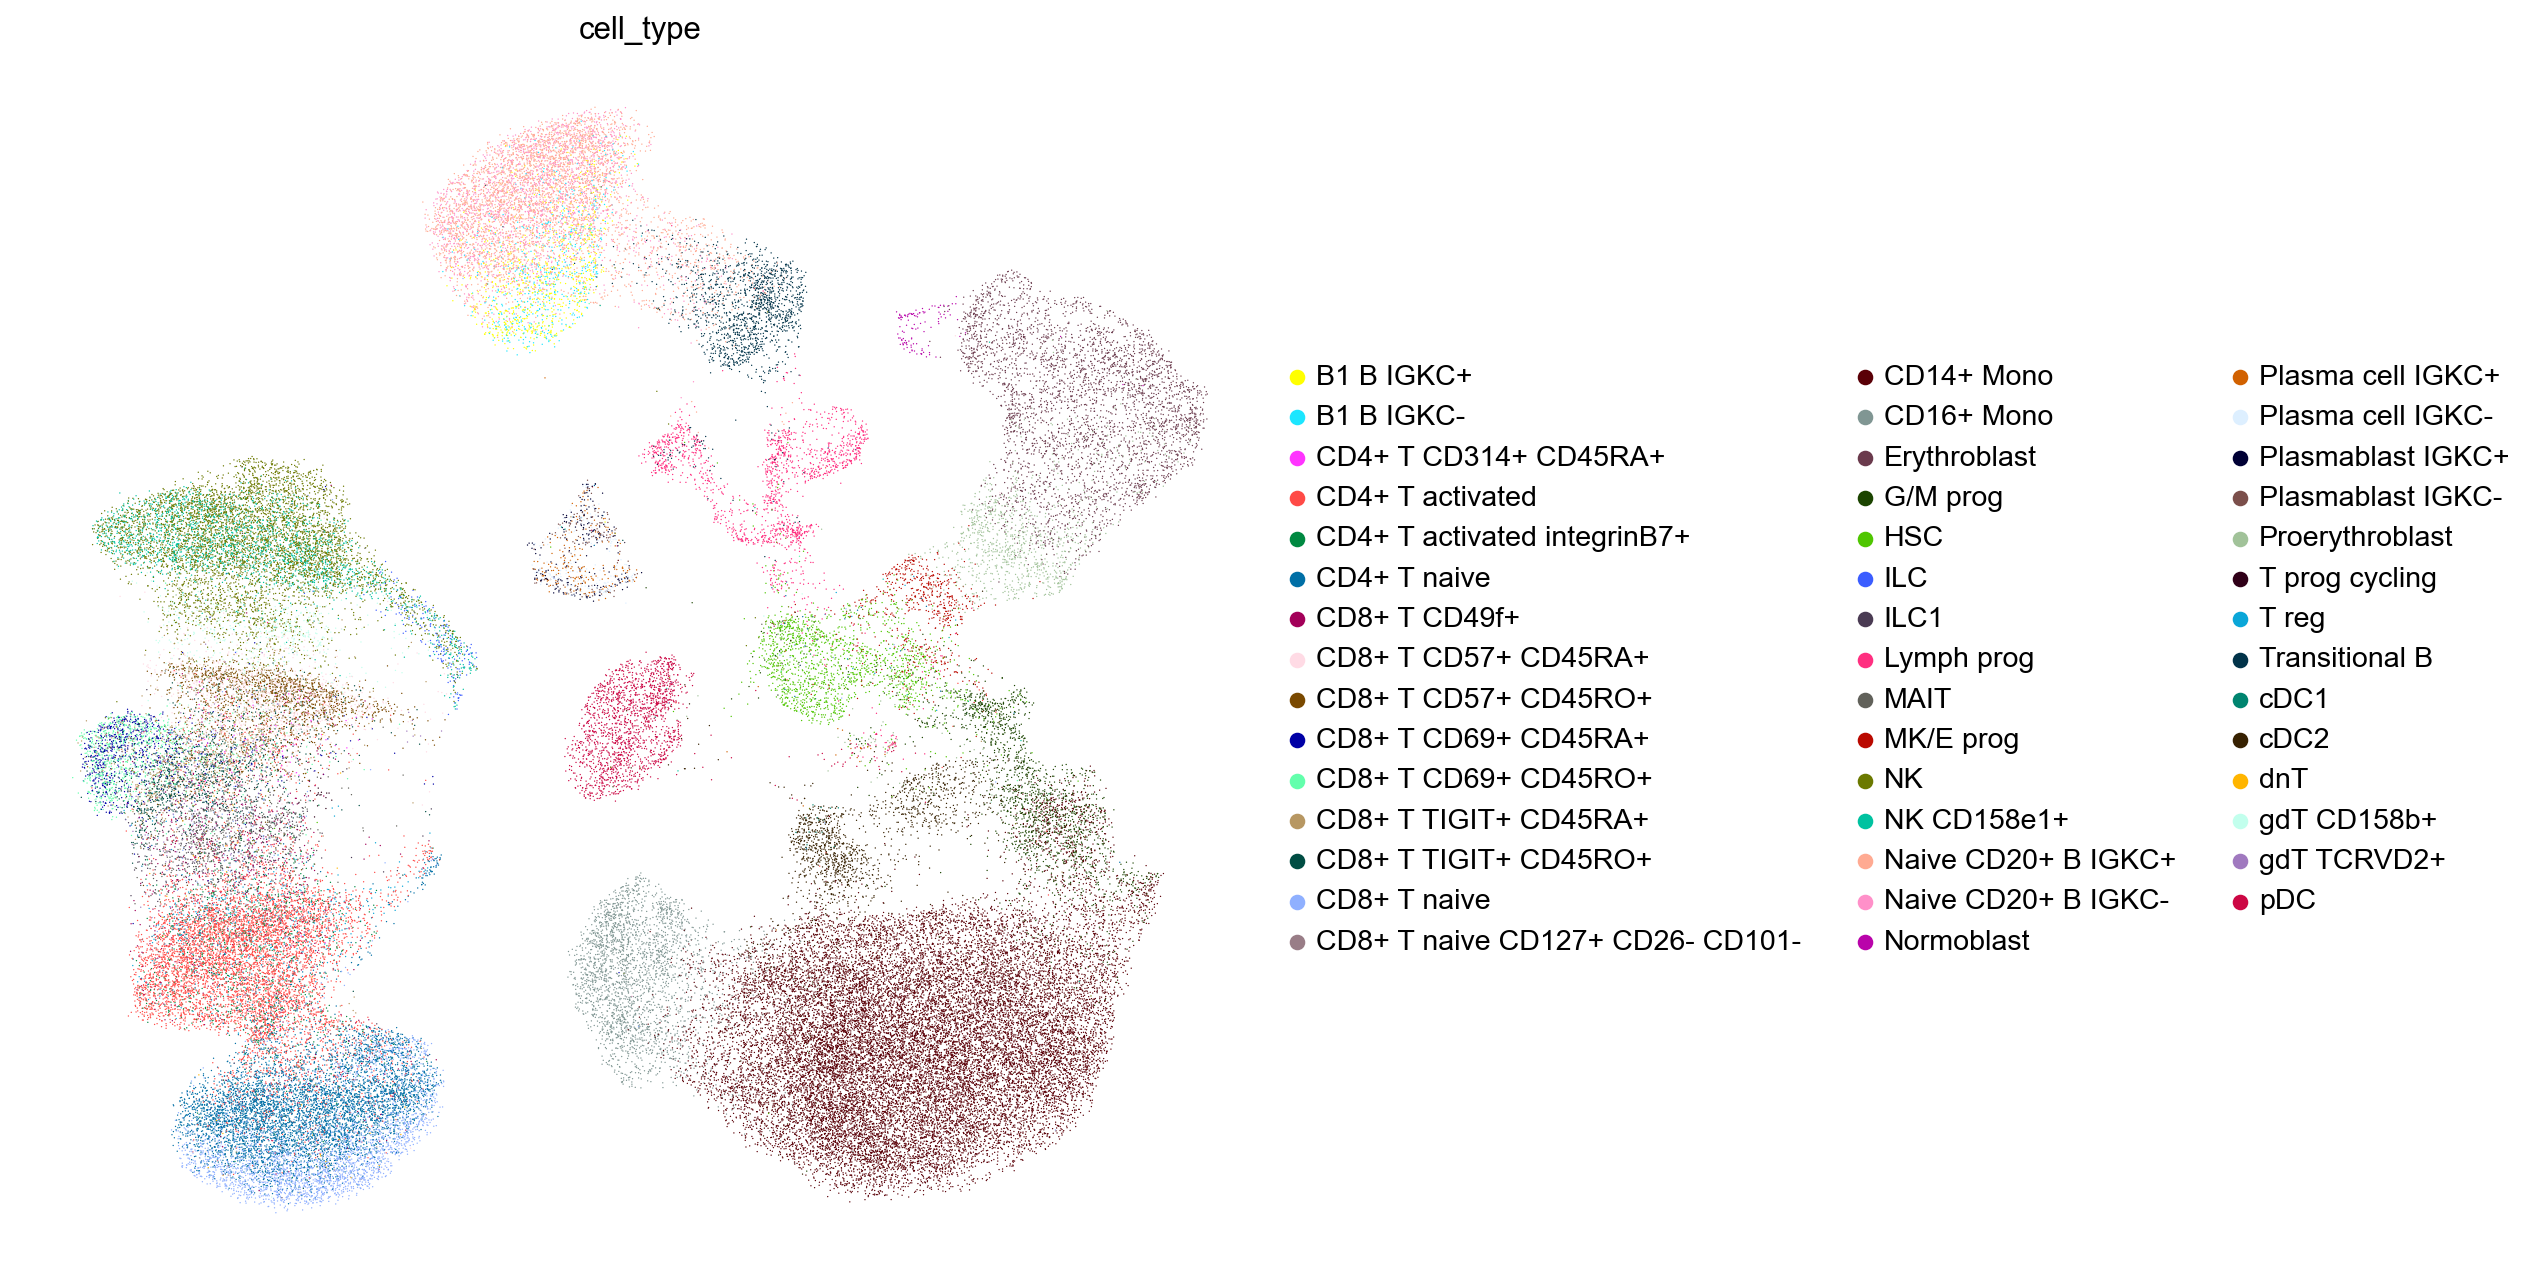

In [16]:
#Whole Neurips dataset, coloured by annotated cell types

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata_neurips, color = ['cell_type'], frameon = False)

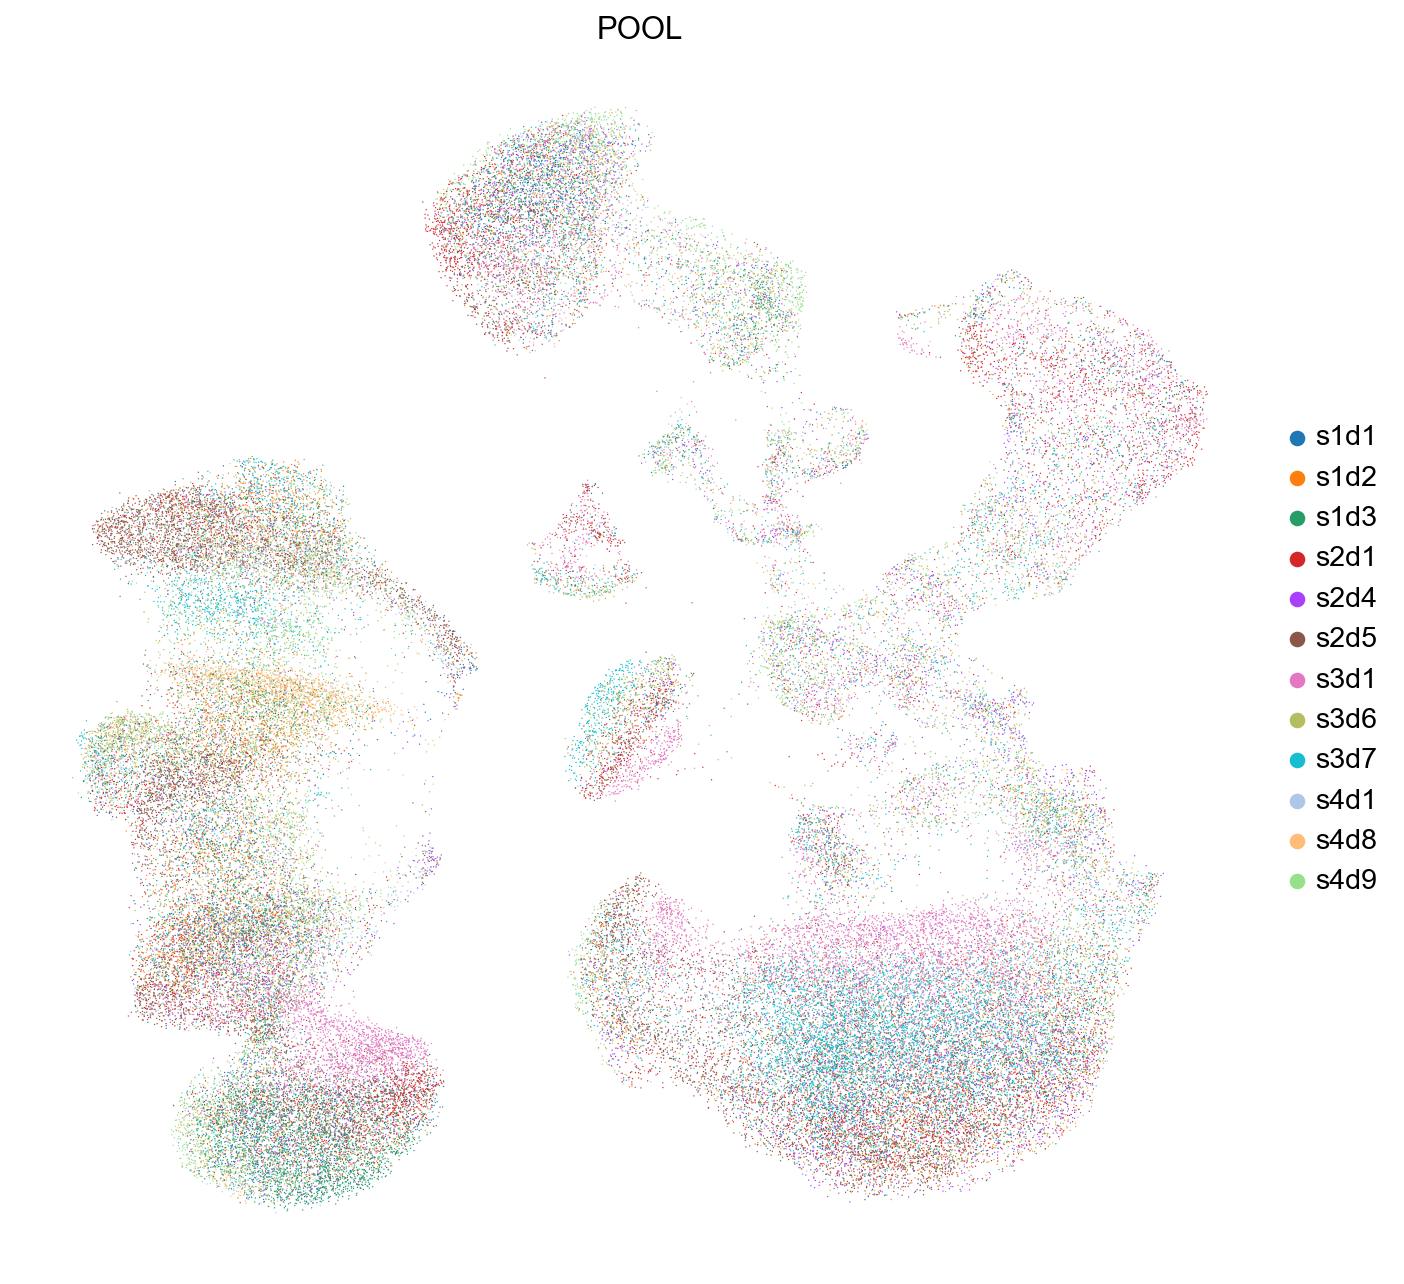

In [17]:
#Whole neurips dataset, coloured by samples

sc.pl.umap(adata_neurips, color = ['POOL'], frameon = False)

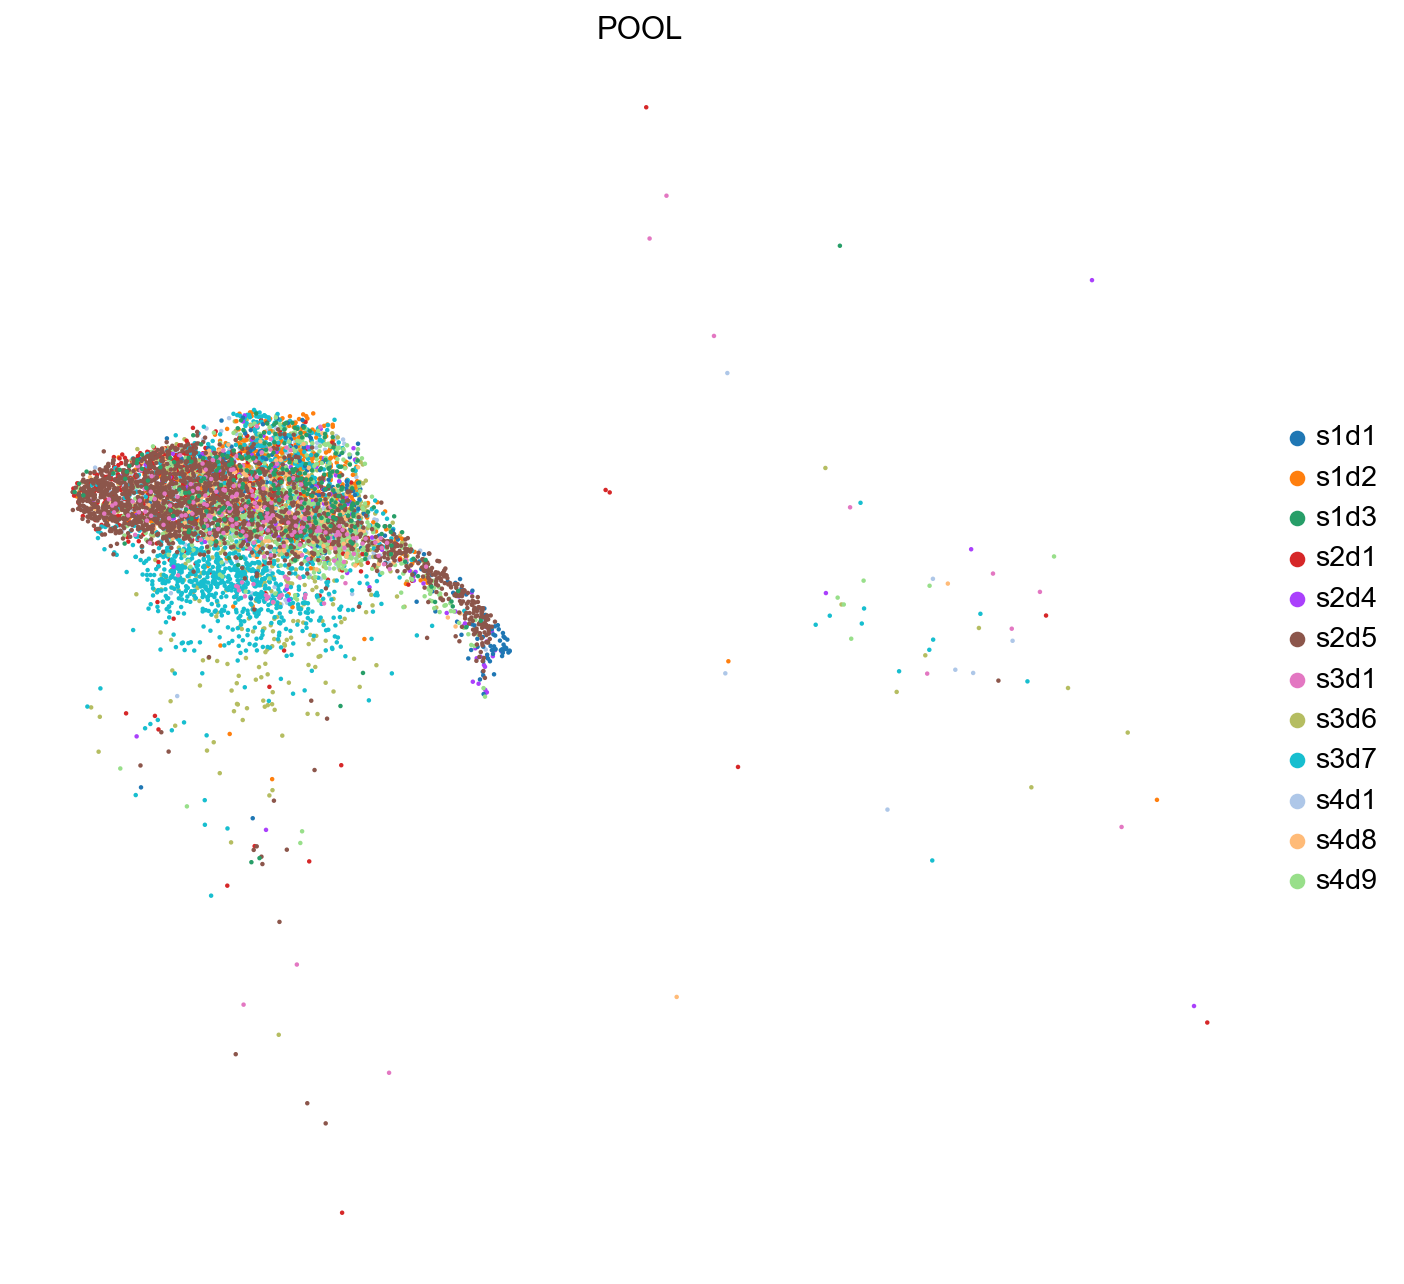

In [18]:
#All samples, but only selected cell types (NK, ILC and gd T cells)

sc.pl.umap(neurips_nk, color = ['POOL'], frameon = False)

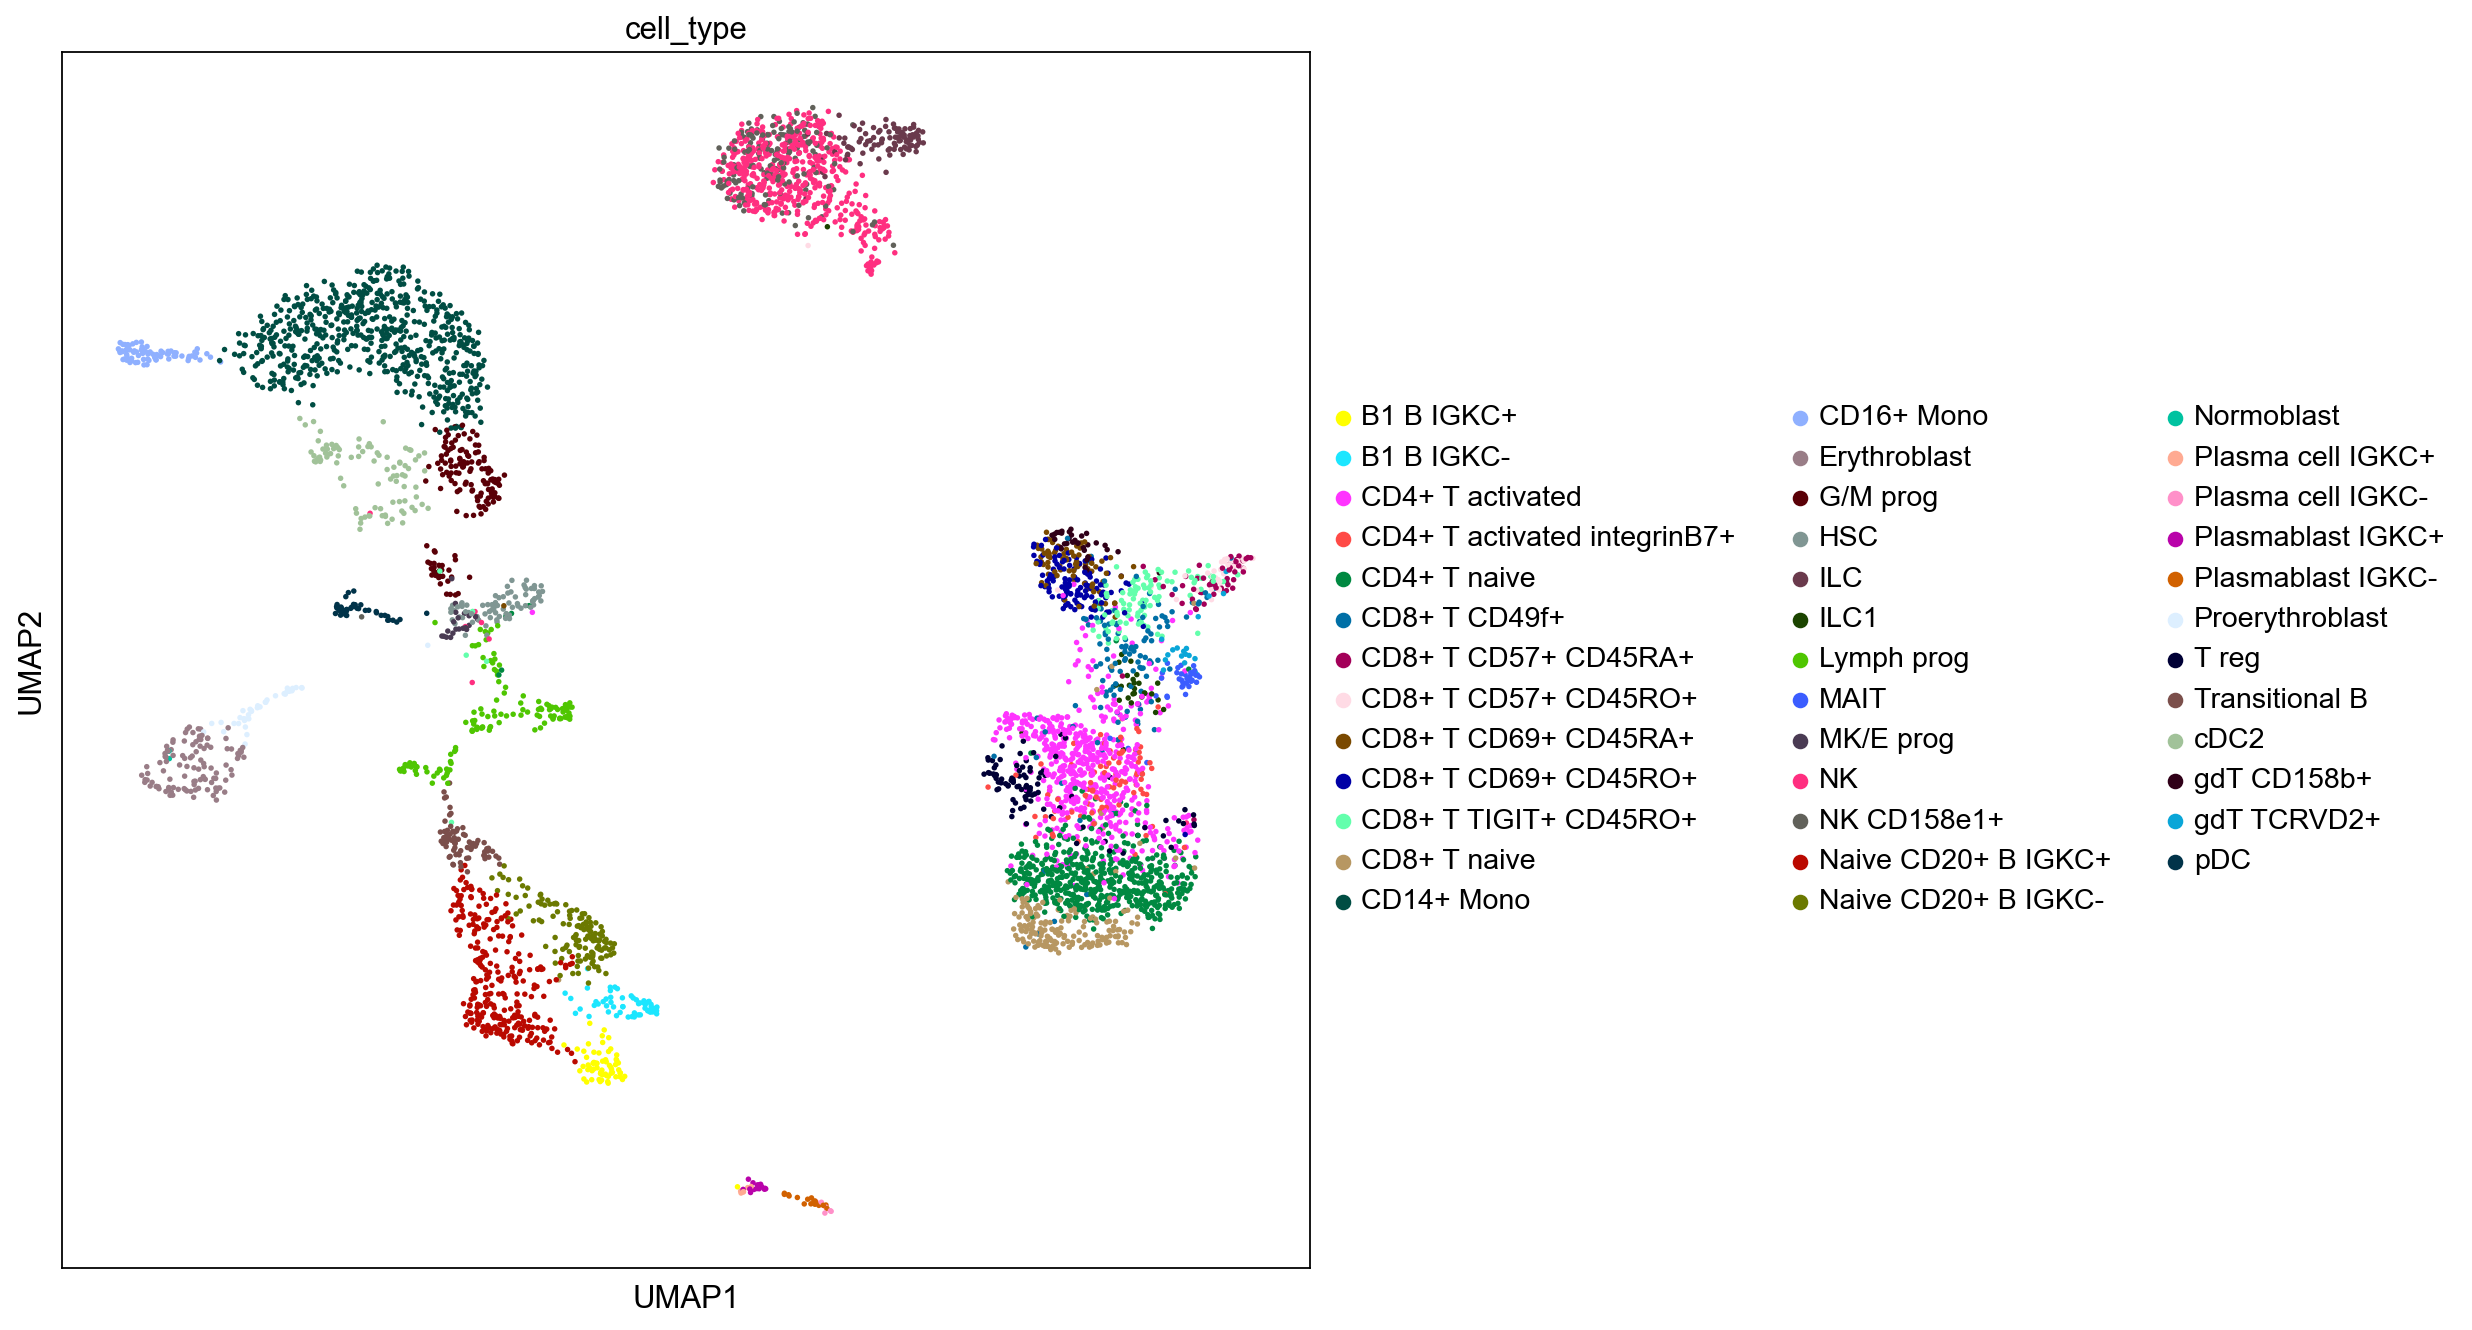

In [19]:
#only one sample

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(eg, color = ['cell_type'])

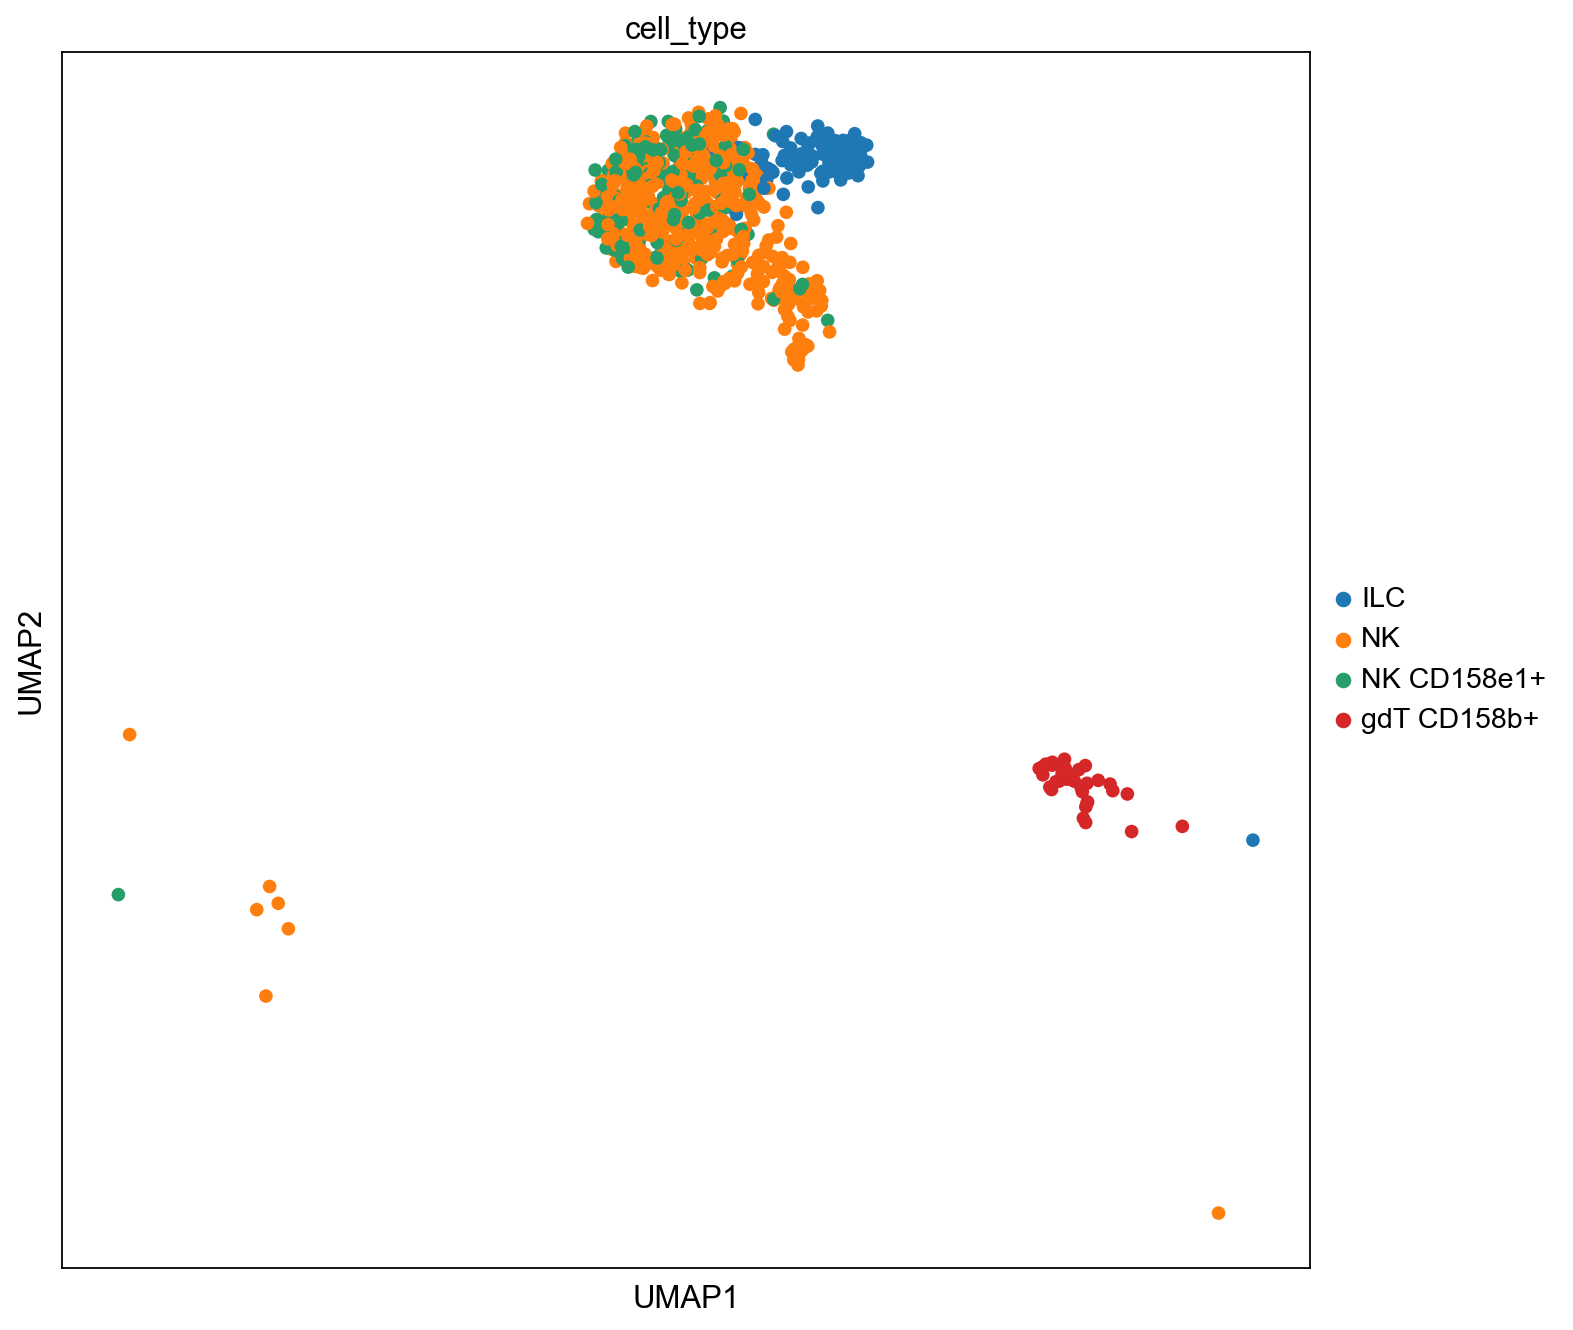

In [20]:
sc.pl.umap(sample_nk, color = ['cell_type'])

## Calculating neighbors both for adata_neurips and for eg (one sample)

In [21]:
#Computing a neighborhood of observations, only one sample

sc.pp.neighbors(eg, use_rep="X_totalVI")  

sc.tl.umap(eg)

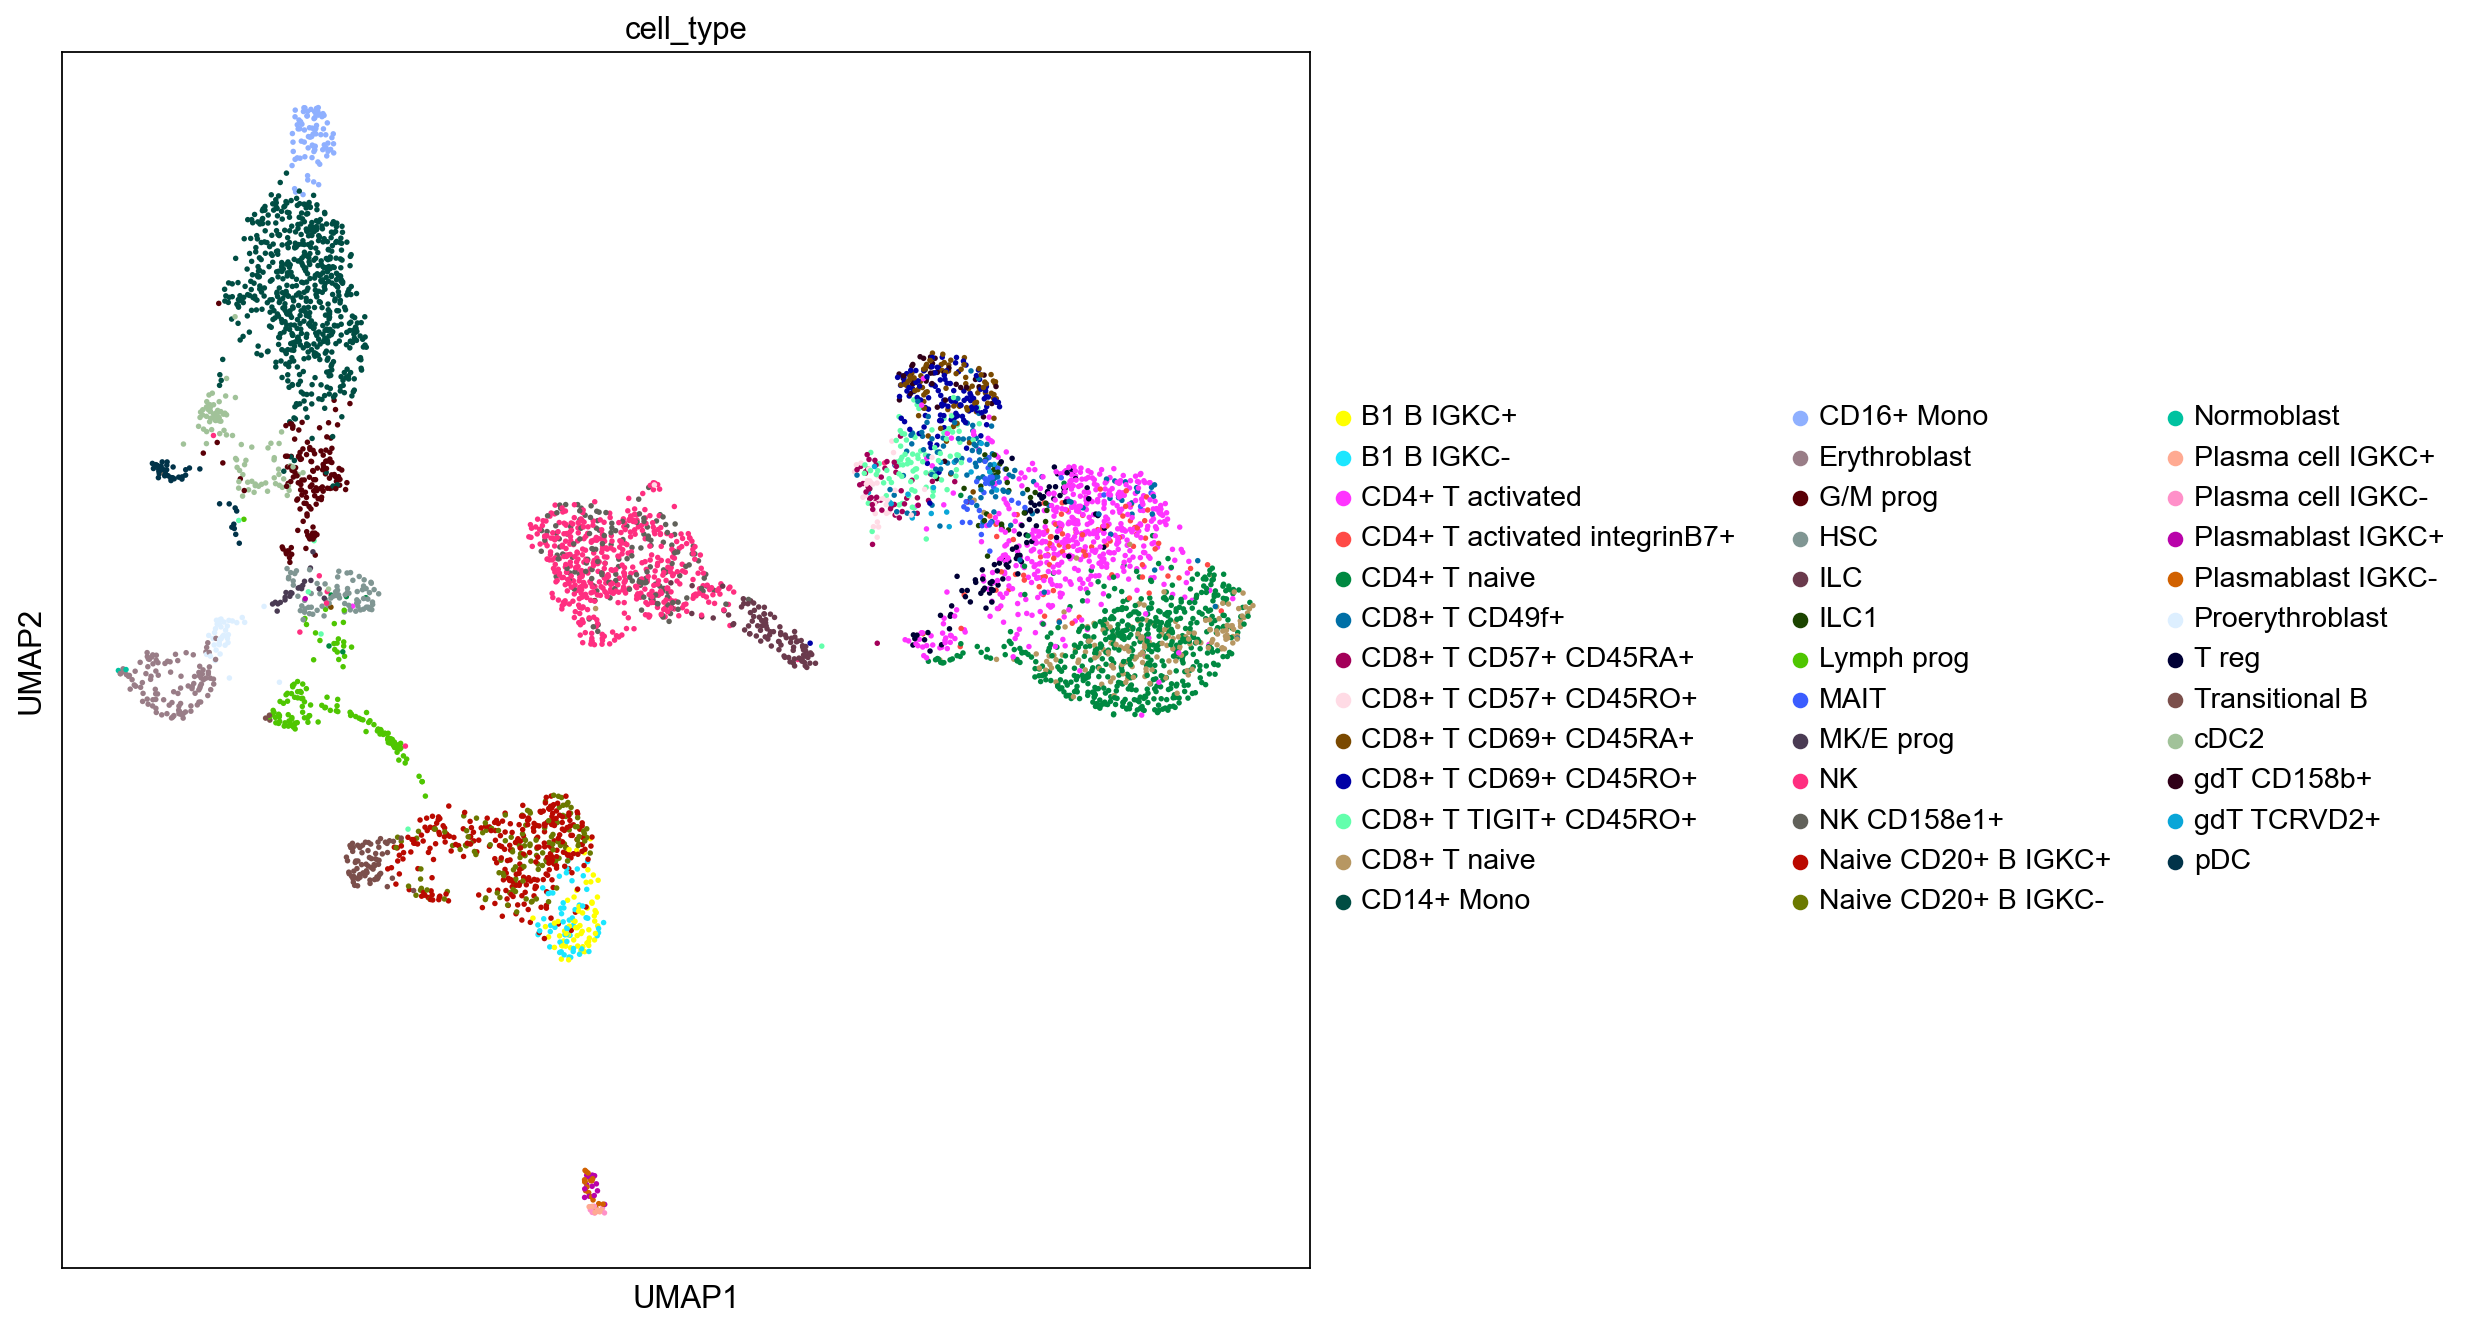

In [22]:
#only one sample

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(eg, color = ['cell_type'])

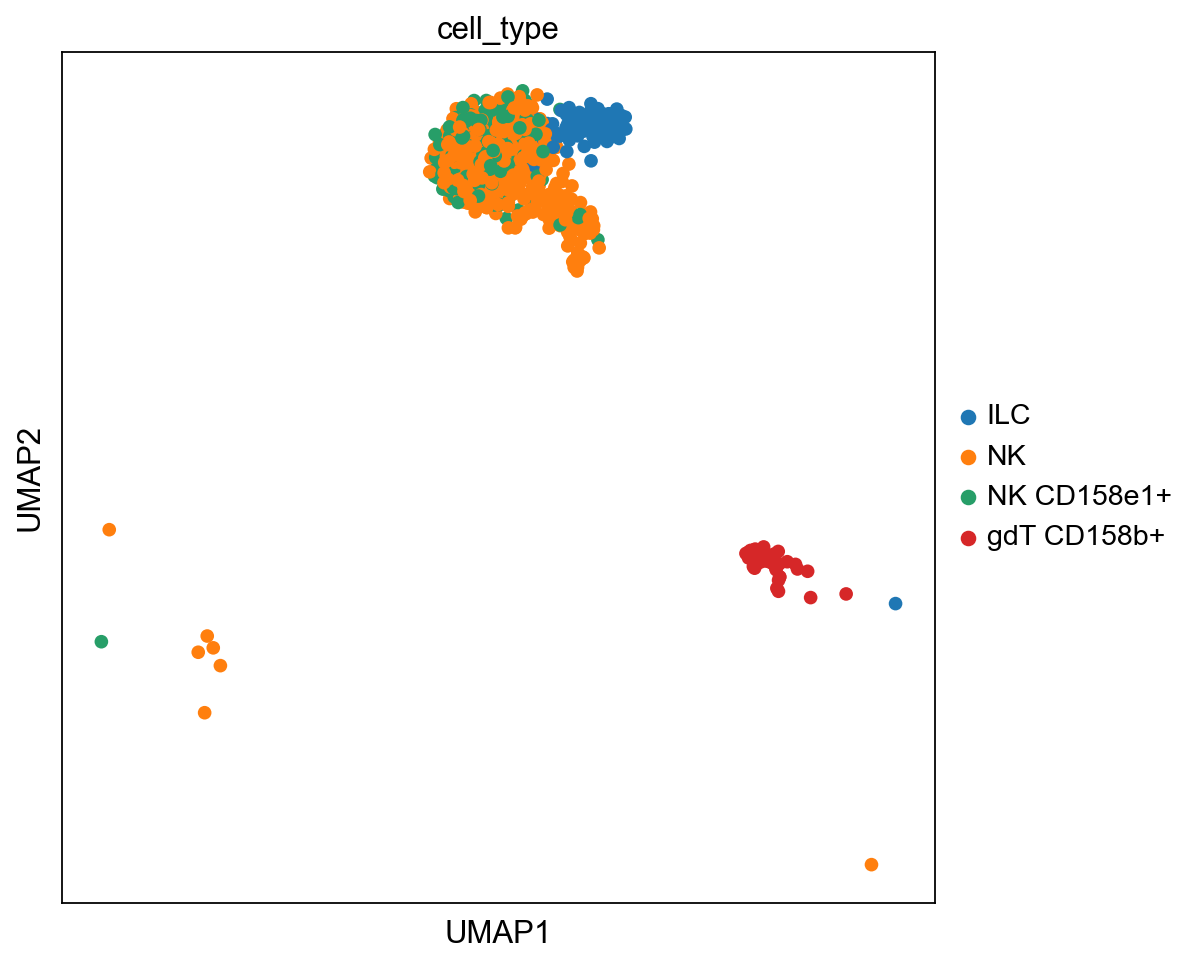

In [23]:
#one sample, only NKs + ILCs

sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(sample_nk, color = ['cell_type'])

## Calculating neigbors for whole dataset,for  one sample (all cell types) and for one sample (only subset of cells)

In [24]:
#Calculating new neigbors, one sample, all cell types

sc.pp.neighbors(eg, use_rep="X_totalVI")   #indicated representation

sc.tl.umap(eg)

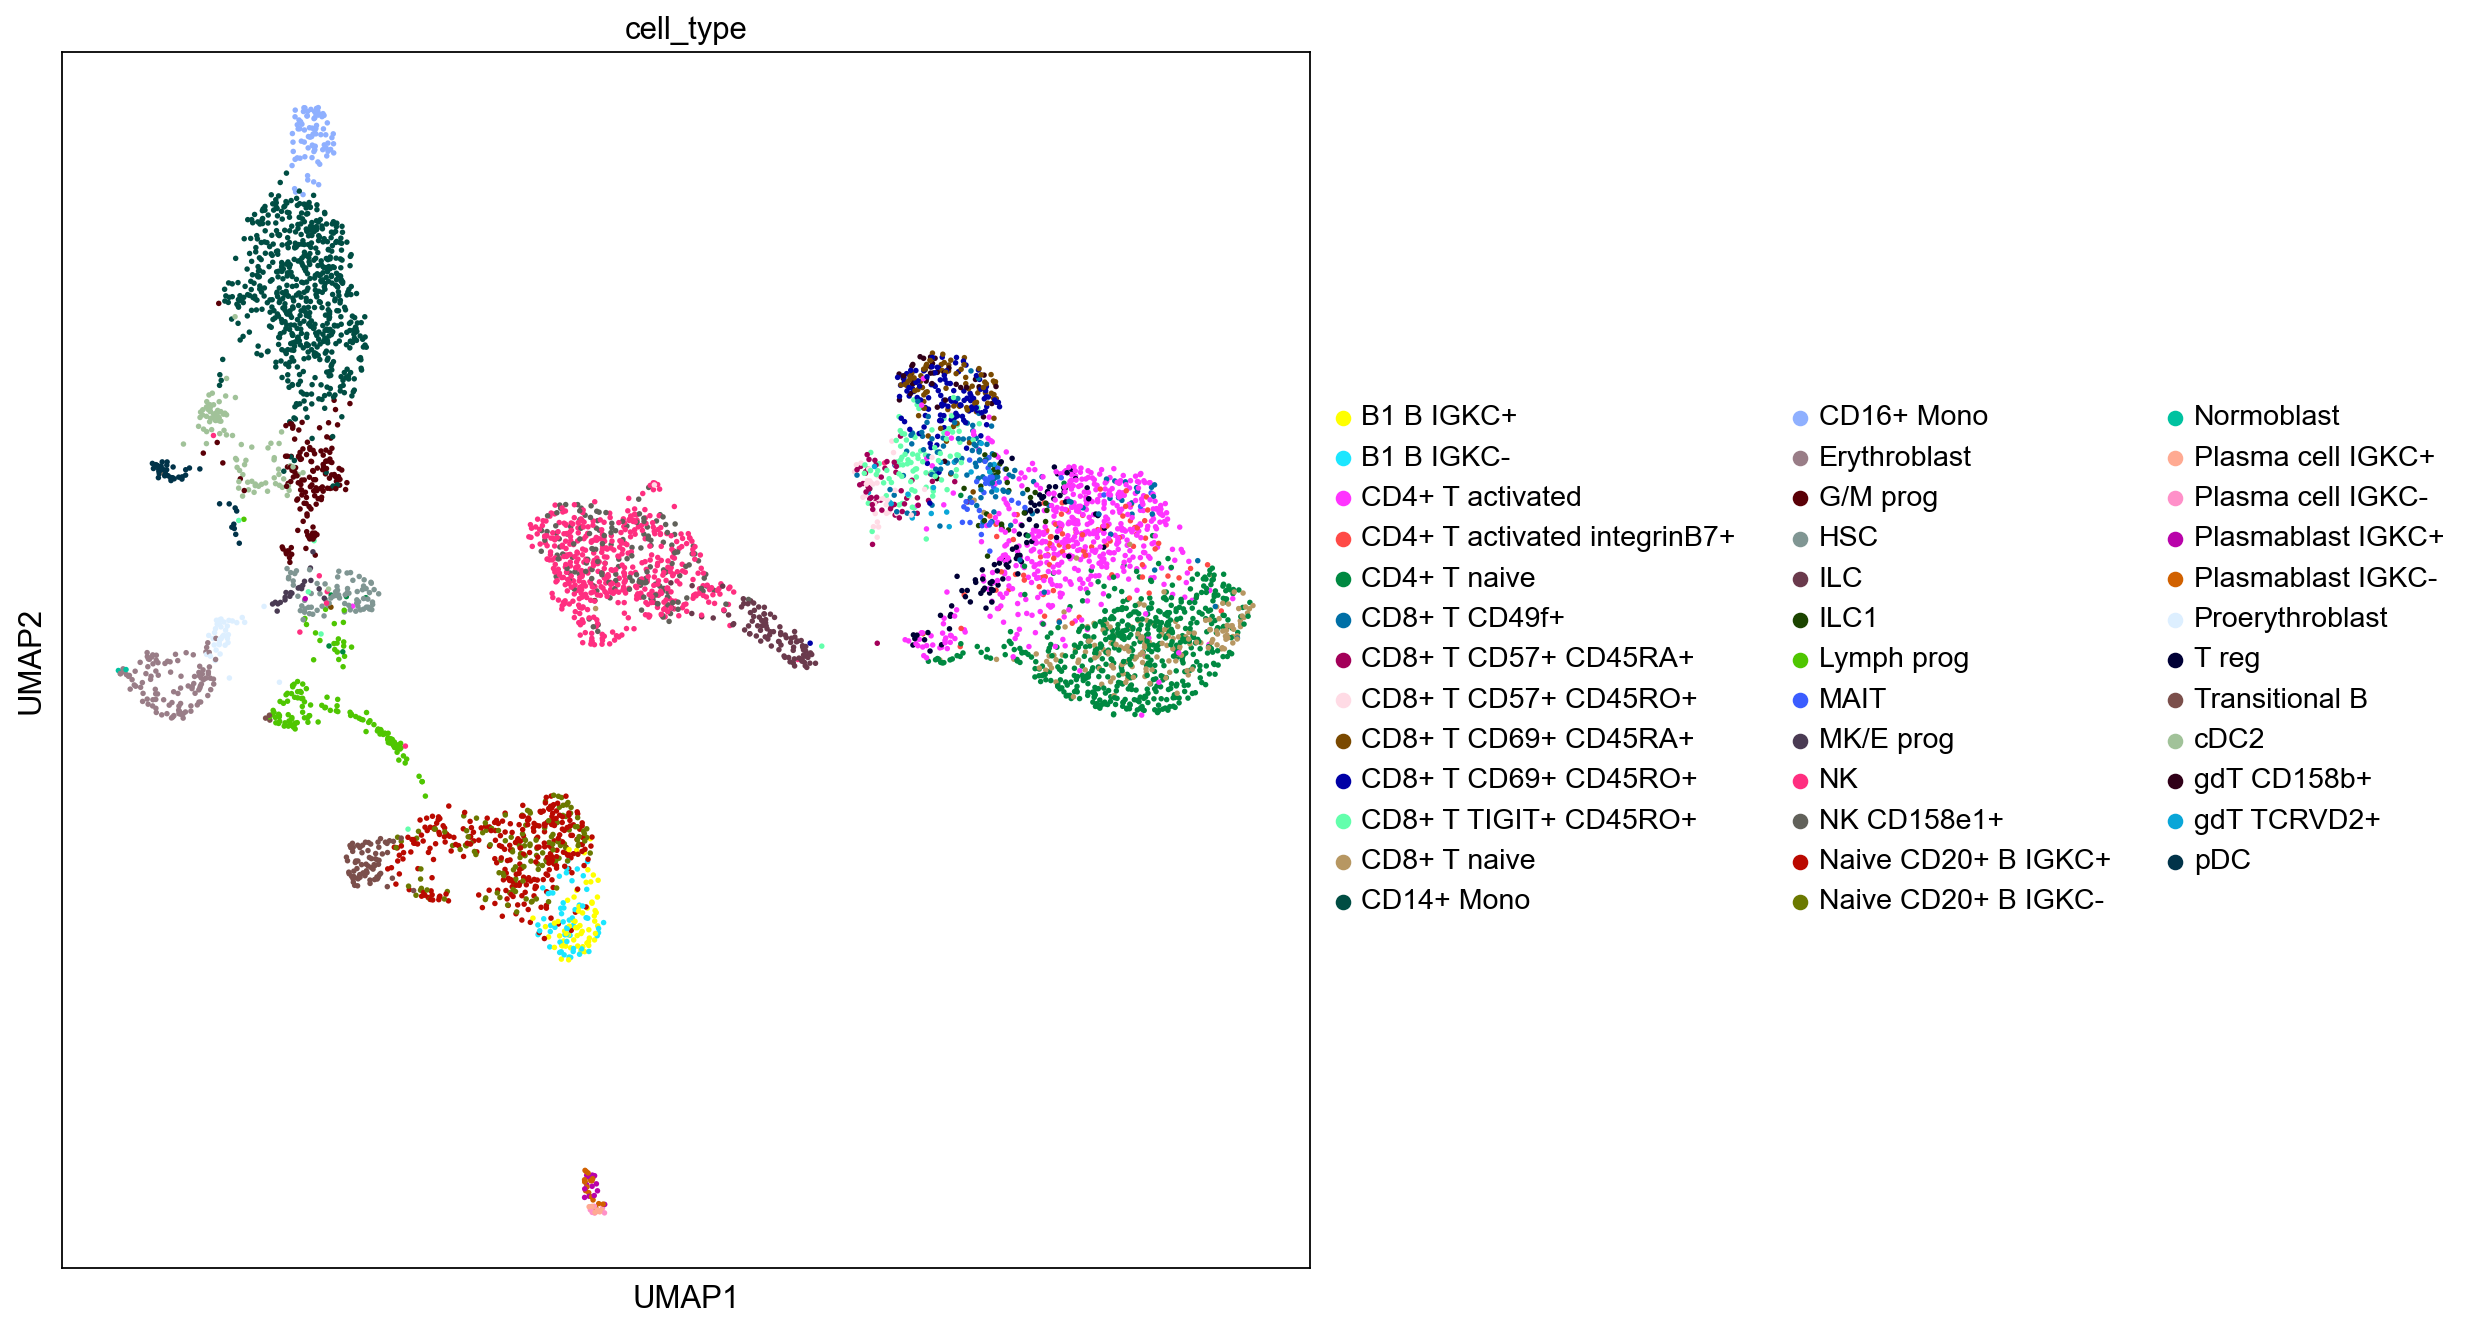

In [25]:
#one sample, all cell types

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(eg, color = ['cell_type'])

In [26]:
#Calculating new neigbors, one sample, only NK + ILC + gd T cells

sc.pp.neighbors(sample_nk, use_rep="X_totalVI")   #indicated representation

sc.tl.umap(sample_nk)

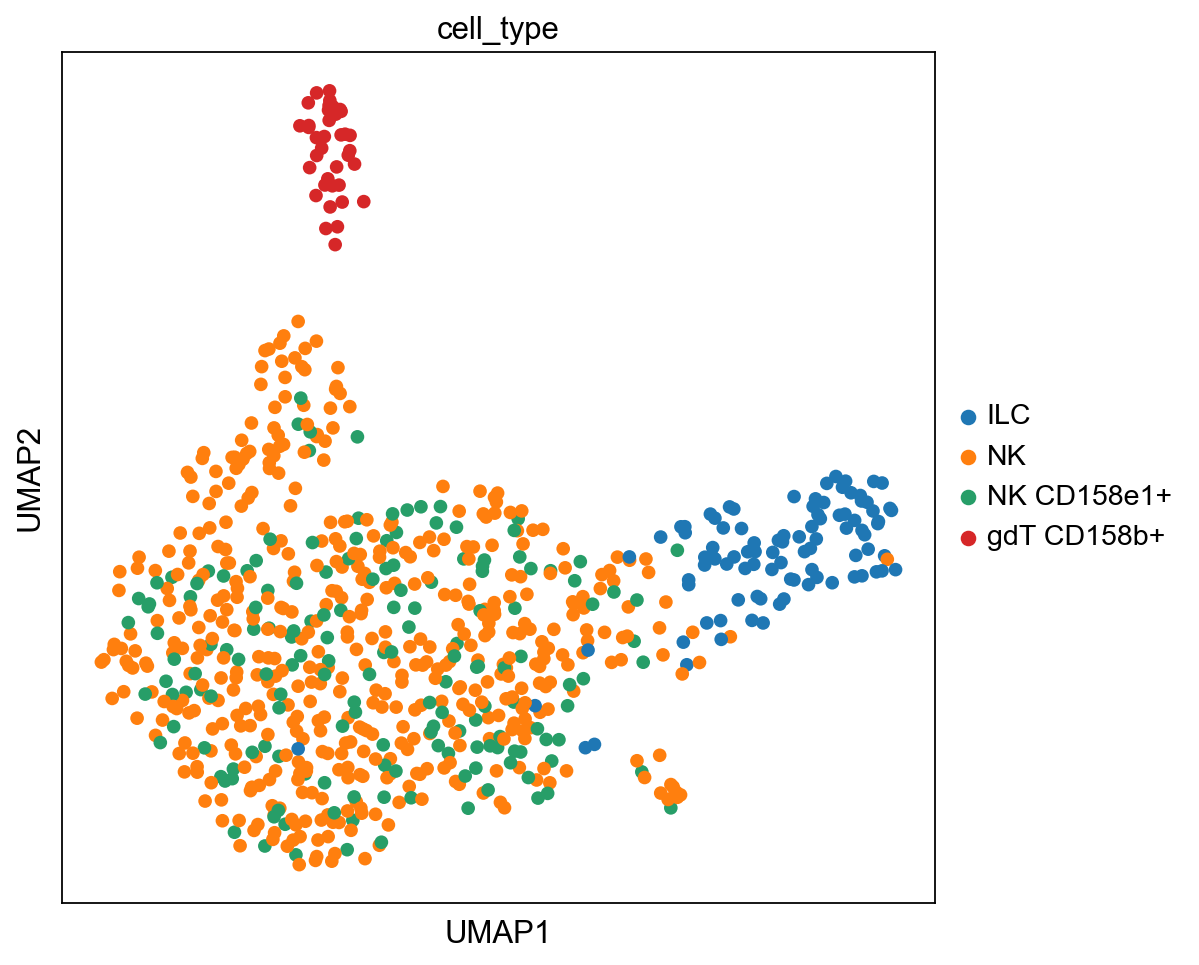

In [27]:
#one sample, only NKs + ILCs

sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(sample_nk, color = ['cell_type'])